**Importing Libraries**

In [1]:
# Importing the libraries
#or data manipulation, analysis, and handling. 
import numpy as np
import pandas as pd

#for machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#for data visualization
import matplotlib as plt
import seaborn as sns

**Data Collection and Analysis**

In [2]:
# Loading the data from the xlsx file to a Pandas DataFrame
prostate_cancer_data = pd.read_excel('Prostate_Cancer.xlsx')

In [3]:
# Displaying the first few rows
print(prostate_cancer_data.head())

  diagnosis_result  radius  texture  perimeter  area  smoothness  compactness  \
0                M      23       12        151   954       0.143        0.278   
1                B       9       13        133  1326       0.143        0.079   
2                M      21       27        130  1203       0.125        0.160   
3                M      14       16         78   386       0.070        0.284   
4                M       9       19        135  1297       0.141        0.133   

   symmetry  fractal_dimension  
0     0.242              0.079  
1     0.181              0.057  
2     0.207              0.060  
3     0.260              0.097  
4     0.181              0.059  


In [4]:
#displaying the number of row and columns in the dataset
print(prostate_cancer_data.shape)

(100, 9)


In [5]:
# Displaying information about the dataset
print(prostate_cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB
None


In [6]:
# Displaying the number of missing values in each column
print(prostate_cancer_data.isnull().sum())

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64


In [7]:
# Displaying some statistical measures about the data
prostate_cancer_data.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


**Data Visualization**

<Axes: >

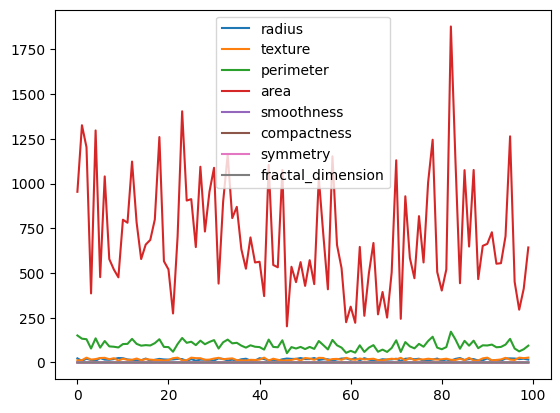

In [8]:
#Line plot using matplotlib
prostate_cancer_data.plot()

<Axes: >

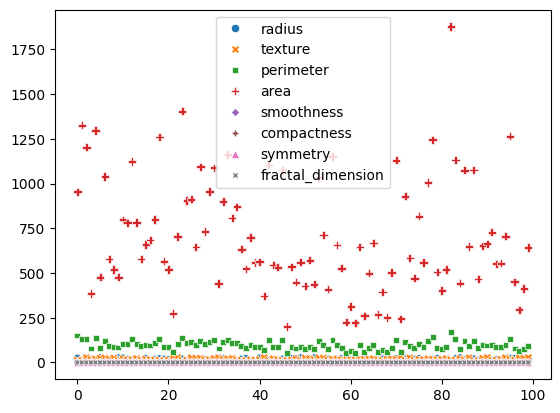

In [9]:
#using seaborn library
#scatter plot
sns.scatterplot(prostate_cancer_data)

In [10]:
# Displaying the distribution of the target variable
prostate_cancer_data['diagnosis_result'].value_counts()


diagnosis_result
M    62
B    38
Name: count, dtype: int64

In [11]:
# Grouping the data based on the target variable
prostate_cancer_data.groupby('diagnosis_result').mean()


,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,,,,,,,,
B,17.947368,17.763158,78.500000,474.342105,0.099053,0.086895,0.184053,0.064605
M,16.177419,18.516129,107.983871,842.951613,0.104984,0.151097,0.198758,0.064742


In [12]:
# Data Pre-Processing
# Separating the features and target
X_ProstateCancer = prostate_cancer_data.drop(columns=['diagnosis_result'], axis=1)
Y_ProstateCancer = prostate_cancer_data['diagnosis_result']

In [13]:
# Displaying the features
print(X_ProstateCancer)

    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension  
0               0.079  
1               0.057  
2               0.060  
3  

In [14]:
# Displaying the target
print(Y_ProstateCancer)

0     M
1     B
2     M
3     M
4     M
     ..
95    M
96    B
97    B
98    B
99    M
Name: diagnosis_result, Length: 100, dtype: object


**Data Splitting**

In [15]:
# Splitting the data into training and test sets
X_train_ProstateCancer, X_test_ProstateCancer, Y_train_ProstateCancer, Y_test_ProstateCancer = train_test_split(X_ProstateCancer, Y_ProstateCancer, test_size=0.2, random_state=2)


In [16]:
# Displaying the shapes of the training and test sets
print(X_ProstateCancer.shape, X_train_ProstateCancer.shape, X_test_ProstateCancer.shape)

(100, 8) (80, 8) (20, 8)


**Model Training**

In [17]:
# Model Training
# Support Vector Machine Model
prostate_cancer_model = svm.SVC(kernel='linear')

In [18]:
# Training the SVM model with training data
prostate_cancer_model.fit(X_train_ProstateCancer, Y_train_ProstateCancer)

SVC(kernel='linear')

**Model Evaluation**

In [19]:
# Model Evaluation
# Accuracy Score on training data
X_train_prediction_ProstateCancer = prostate_cancer_model.predict(X_train_ProstateCancer)
training_data_accuracy_ProstateCancer = accuracy_score(Y_train_ProstateCancer, X_train_prediction_ProstateCancer)
print('Accuracy score on training data:', training_data_accuracy_ProstateCancer)

Accuracy score on training data: 0.85


In [20]:
# Accuracy score on test data
X_test_prediction_ProstateCancer = prostate_cancer_model.predict(X_test_ProstateCancer)
test_data_accuracy_ProstateCancer = accuracy_score(Y_test_ProstateCancer, X_test_prediction_ProstateCancer)
print('Accuracy score on test data:', test_data_accuracy_ProstateCancer)

Accuracy score on test data: 0.9


In [21]:
# Precision on test data
precision = precision_score(Y_test_ProstateCancer, X_test_prediction_ProstateCancer, pos_label='B')
print('Precision on test data:', precision)

# Recall on test data
recall = recall_score(Y_test_ProstateCancer, X_test_prediction_ProstateCancer, pos_label='B')
print('Recall on test data:', recall)

# F1-score on test data
f1 = f1_score(Y_test_ProstateCancer, X_test_prediction_ProstateCancer, pos_label='B')
print('F1 score on test data:', f1)

# Confusion Matrix on test data
conf_matrix = confusion_matrix(Y_test_ProstateCancer, X_test_prediction_ProstateCancer)
print('Confusion Matrix on test data:\n', conf_matrix)

Precision on test data: 0.8
Recall on test data: 0.8
F1 score on test data: 0.8000000000000002
Confusion Matrix on test data:
 [[ 4  1]
 [ 1 14]]


**Building a Predictive System**

In [22]:

# Building a Predictive System
# Example input data
input_data_ProstateCancer = np.array([17,11,87,566,0.098,0.081,0.189,0.058])


# Reshape the input data
input_data_reshaped_ProstateCancer = input_data_ProstateCancer.reshape(1, -1)

# Make a prediction
prediction_ProstateCancer = prostate_cancer_model.predict(input_data_reshaped_ProstateCancer)
print(prediction_ProstateCancer)

# Interpret the prediction
if prediction_ProstateCancer[0] == 'M':
    print("The Prostate cancer is malignant.")
else:
    print("The Prostate cancer is benign.")

['B']
The Prostate cancer is benign.


C:\Users\taiga\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Saving the model**

In [23]:
import pickle
filename = 'prostate_cancer_model.sav'
pickle.dump(prostate_cancer_model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('prostate_cancer_model.sav', 'rb'))

In [24]:
#printing the names of the columns
for column in X_ProstateCancer.columns:
  print(column)

radius
texture
perimeter
area
smoothness
compactness
symmetry
fractal_dimension
